In [5]:
 if (!require('devtools')) install.packages('devtools')
devtools::install_github('behavioral-ds/evently')

Skipping install of 'evently' from a github remote, the SHA1 (9be4daa8) has not changed since last install.
  Use `force = TRUE` to force installation



In [6]:
library(evently)

In [7]:
setup_ampl("/root/ampl")

In [8]:
library(repr)
options(repr.plot.width=14, repr.plot.height=7, repr.plot.res = 200)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [34]:
print_retweet_waiting <- function(dataset) {
    vec <- c()
    for (i in 2:nrow(dataset)-1){
        val <- c(dataset[i,]$time-dataset[i-1,]$time)
        vec <- append(vec, c(dataset[i,]$time-dataset[i-1,]$time))
    }
    barplot(vec)
}

Zostały zebrane dwa zbiory tweetów. 
Pierwszy to odpowiedzi na tweet Elona Muska z 2018 roku "I <3 anime". Postać znana na całym świecie - retweety mniej zależne od cyklu dnia i nocy. Dodatkowo jest to tweet względnie niezależny od innych wydarzeń.
Drugi to odpowiedzi na tweet dotyczący zakładu czy Liz Truss przetrwa dłużej od sałaty (spojler: nie przetrwała). Tweet znaczący lokalnie (dotyczy głównie UK), a retweety uzależnione w znaczący sposób od zewnętrzych czynników (dołączenie do sałaty peruki, zębów itp, a później dymisja samej Liz).

In [15]:
lettuce <- read.csv(file = '/kaggle/input/tweets-lettuce/tweetsw.csv', header = T)
lettuce <- lettuce[order(lettuce$time),]
rownames(lettuce) <- 1:nrow(lettuce)
nrow(lettuce)

[1] 203

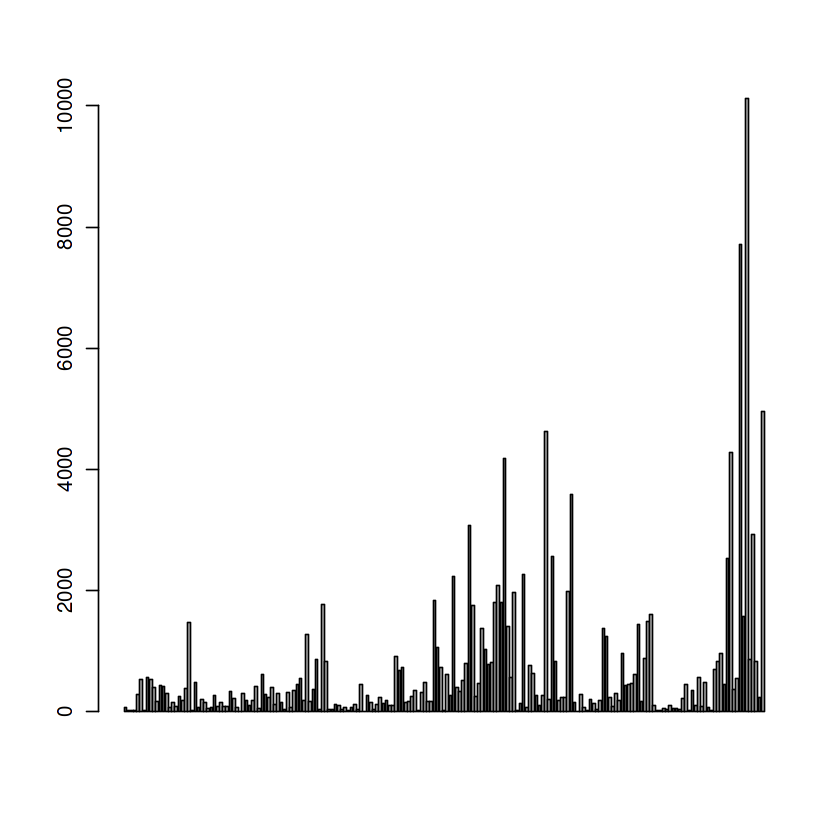

In [36]:
print_retweet_waiting(lettuce)

In [11]:
elon <- read.csv(file = '/kaggle/input/tweets/elon_anime.csv', header = T)
elon <- elon[order(elon$time),]
rownames(elon) <- 1:nrow(elon)
nrow(elon)

[1] 164

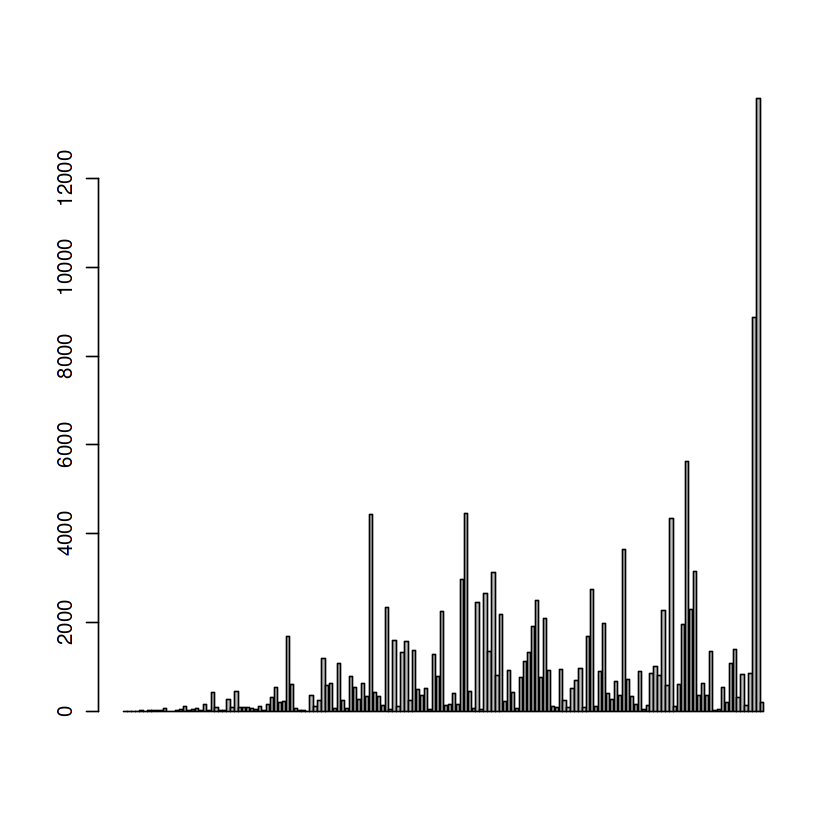

In [37]:
print_retweet_waiting(elon)

In [38]:
run_hawkes <- function(dataset, cut_time, model) {
    org_size = nrow(dataset)
    train_set = dataset[with(dataset, time <= cut_time),]
    fitted_model <- fit_series(train_set, model_type = model, observation_time = cut_time)
    print(fitted_model)
    print("Original set size:")
    print(org_size)
    print("Train set size:")
    print(nrow(train_set))
    print("Branching factor:")
    print(get_branching_factor(fitted_model))
    prediction <- predict_final_popularity(fitted_model)
    print("Final tweets count prediction")
    print(prediction)
    print("Error rate")
    print(100*abs(nrow(dataset) - prediction)/nrow(dataset))
    plot_event_series(fitted_model)
}

- Model: EXP 
- No. of cascades: 1 
- init_par:
  K 7.44e-01; theta 3.55e-01
- par:
  K 9.94e-01; theta 2.48e-03
- Neg Log Likelihood: 324.808 
- lower_bound:
  K 1.00e-100; theta 1.00e-100
- upper_bound:
  K 1.00e+04; theta 3.00e+02
- Convergence: 0 
[1] "Original set size:"
[1] 164
[1] "Train set size:"
[1] 55
[1] "Branching factor:"
[1] 0.994258
[1] "Final tweets count prediction"
[1] 174.1607
[1] "Error rate"
[1] 6.19552


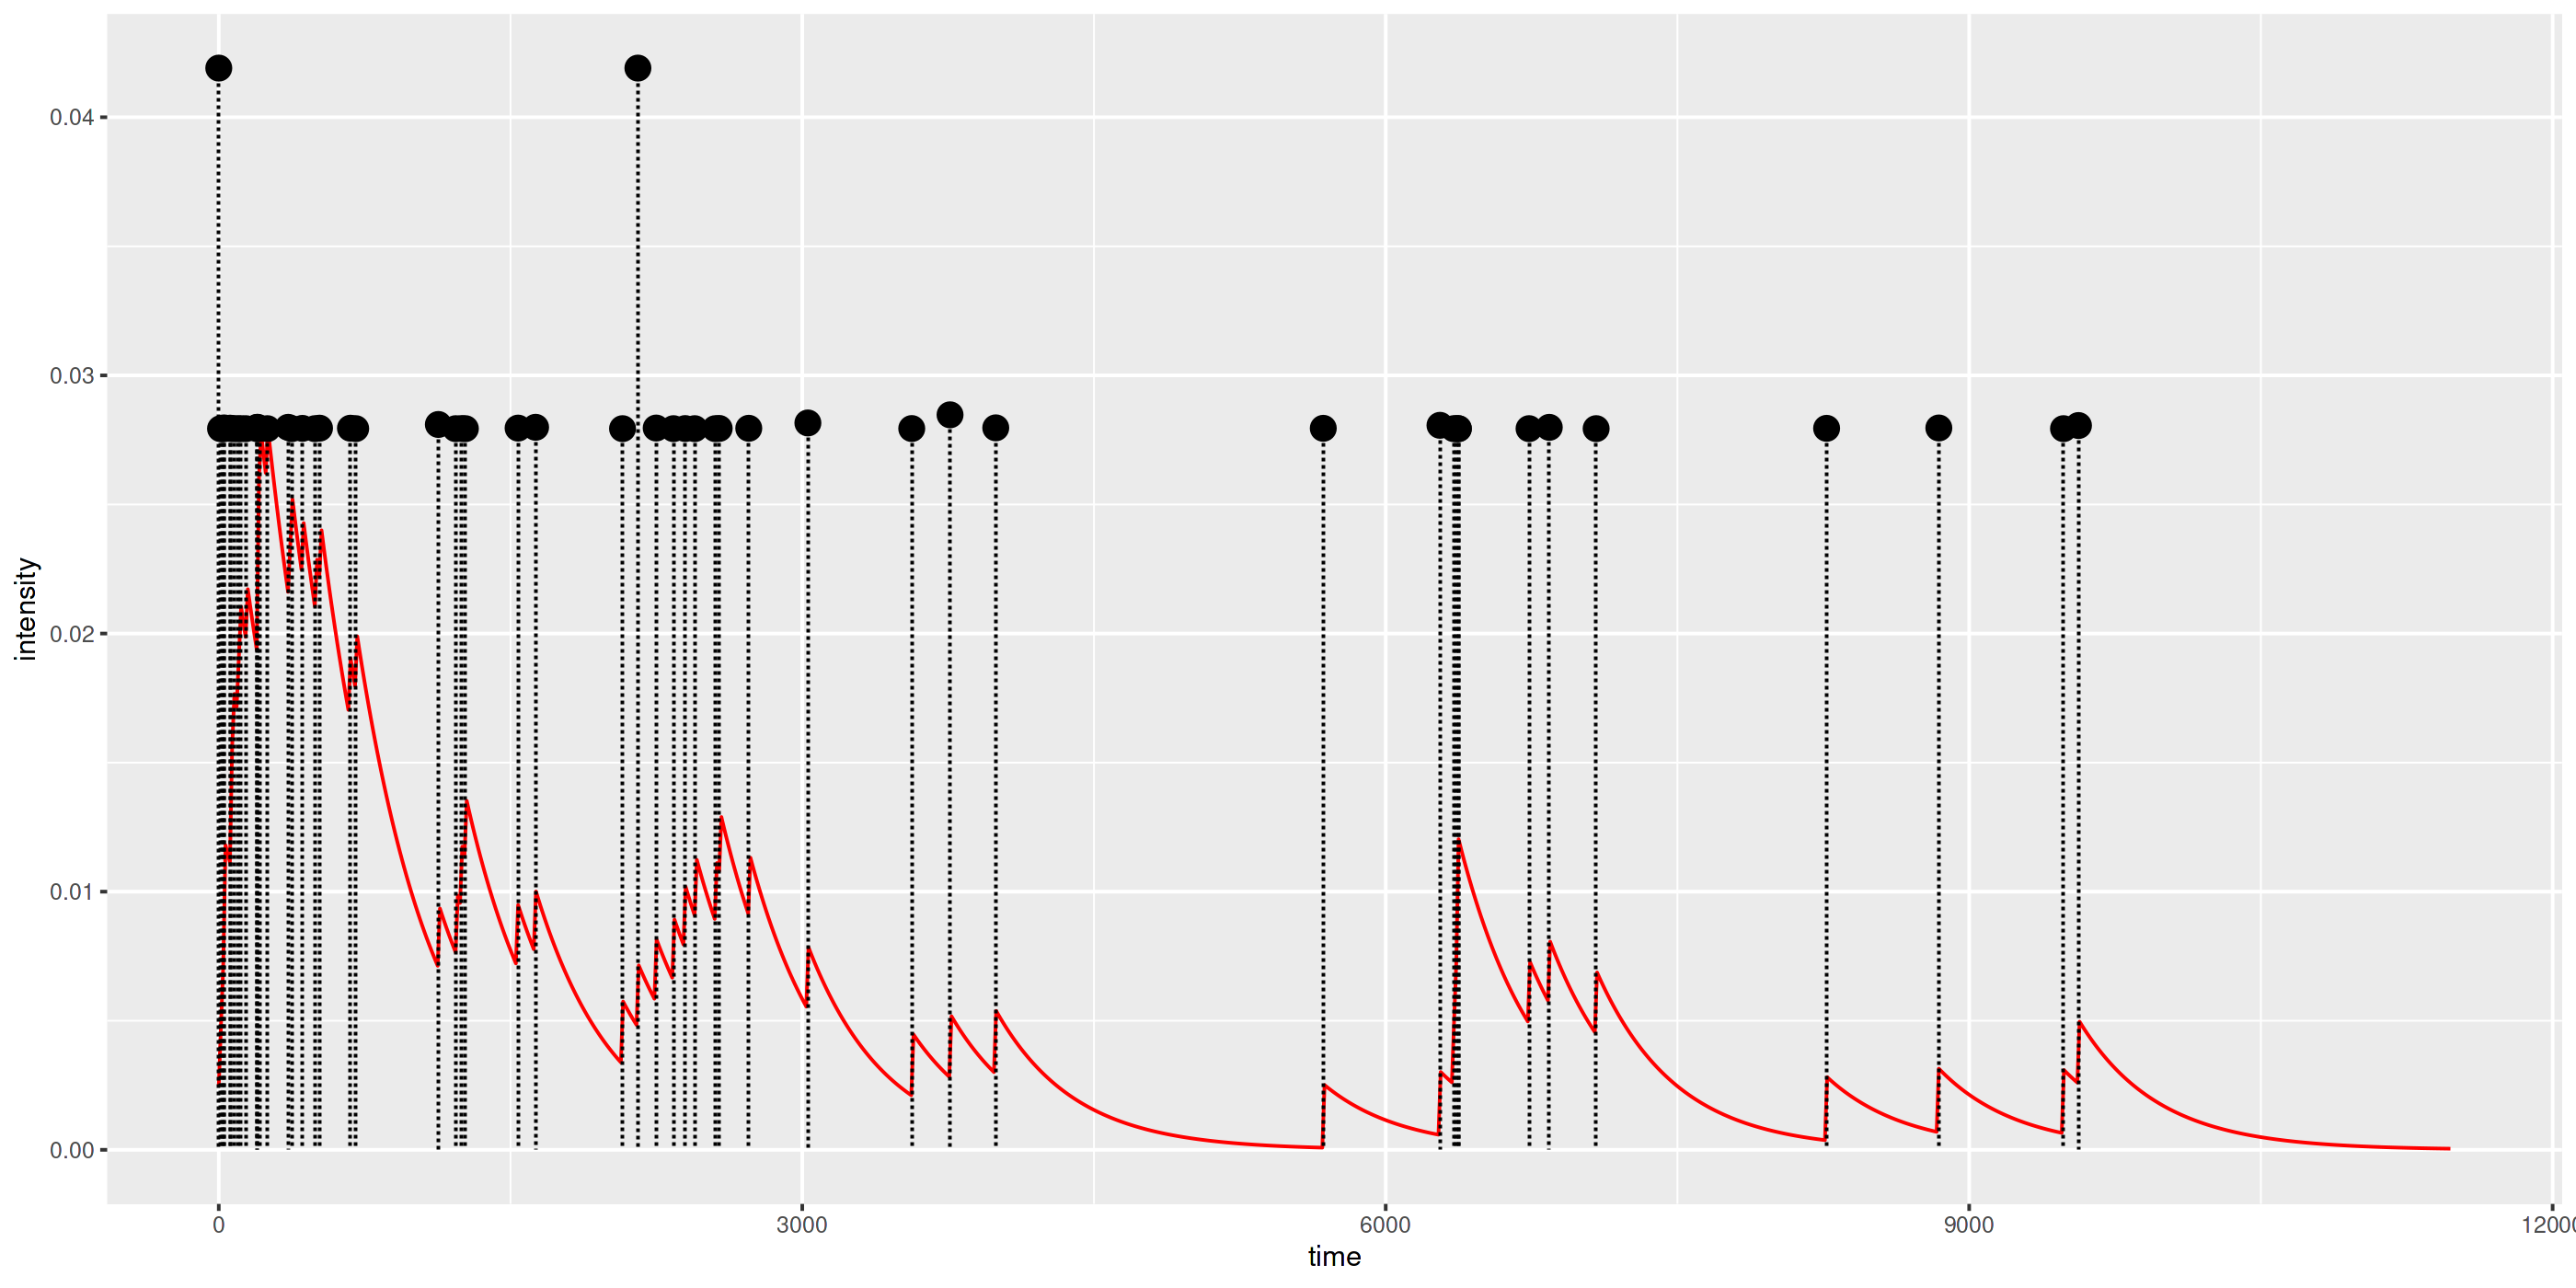

In [39]:
run_hawkes(elon, 10000, 'EXP')

- Model: mEXP 
- No. of cascades: 1 
- init_par:
  K 3.11e-01; beta 5.55e-01; theta 2.49e+00
- par:
  K 5.41e-03; beta 4.16e-01; theta 2.01e-03
- Neg Log Likelihood: 318.27 
- lower_bound:
  K 1.00e-100; beta 1.00e-100; theta 1.00e-100
- upper_bound:
  K 1.00e+04; beta 1.02e+00; theta 3.00e+02
- Convergence: 0 
[1] "Original set size:"
[1] 164
[1] "Train set size:"
[1] 55
[1] "Branching factor:"
[1] 0.009160738
[1] "Final tweets count prediction"
[1] 55.8379
[1] "Error rate"
[1] 65.9525


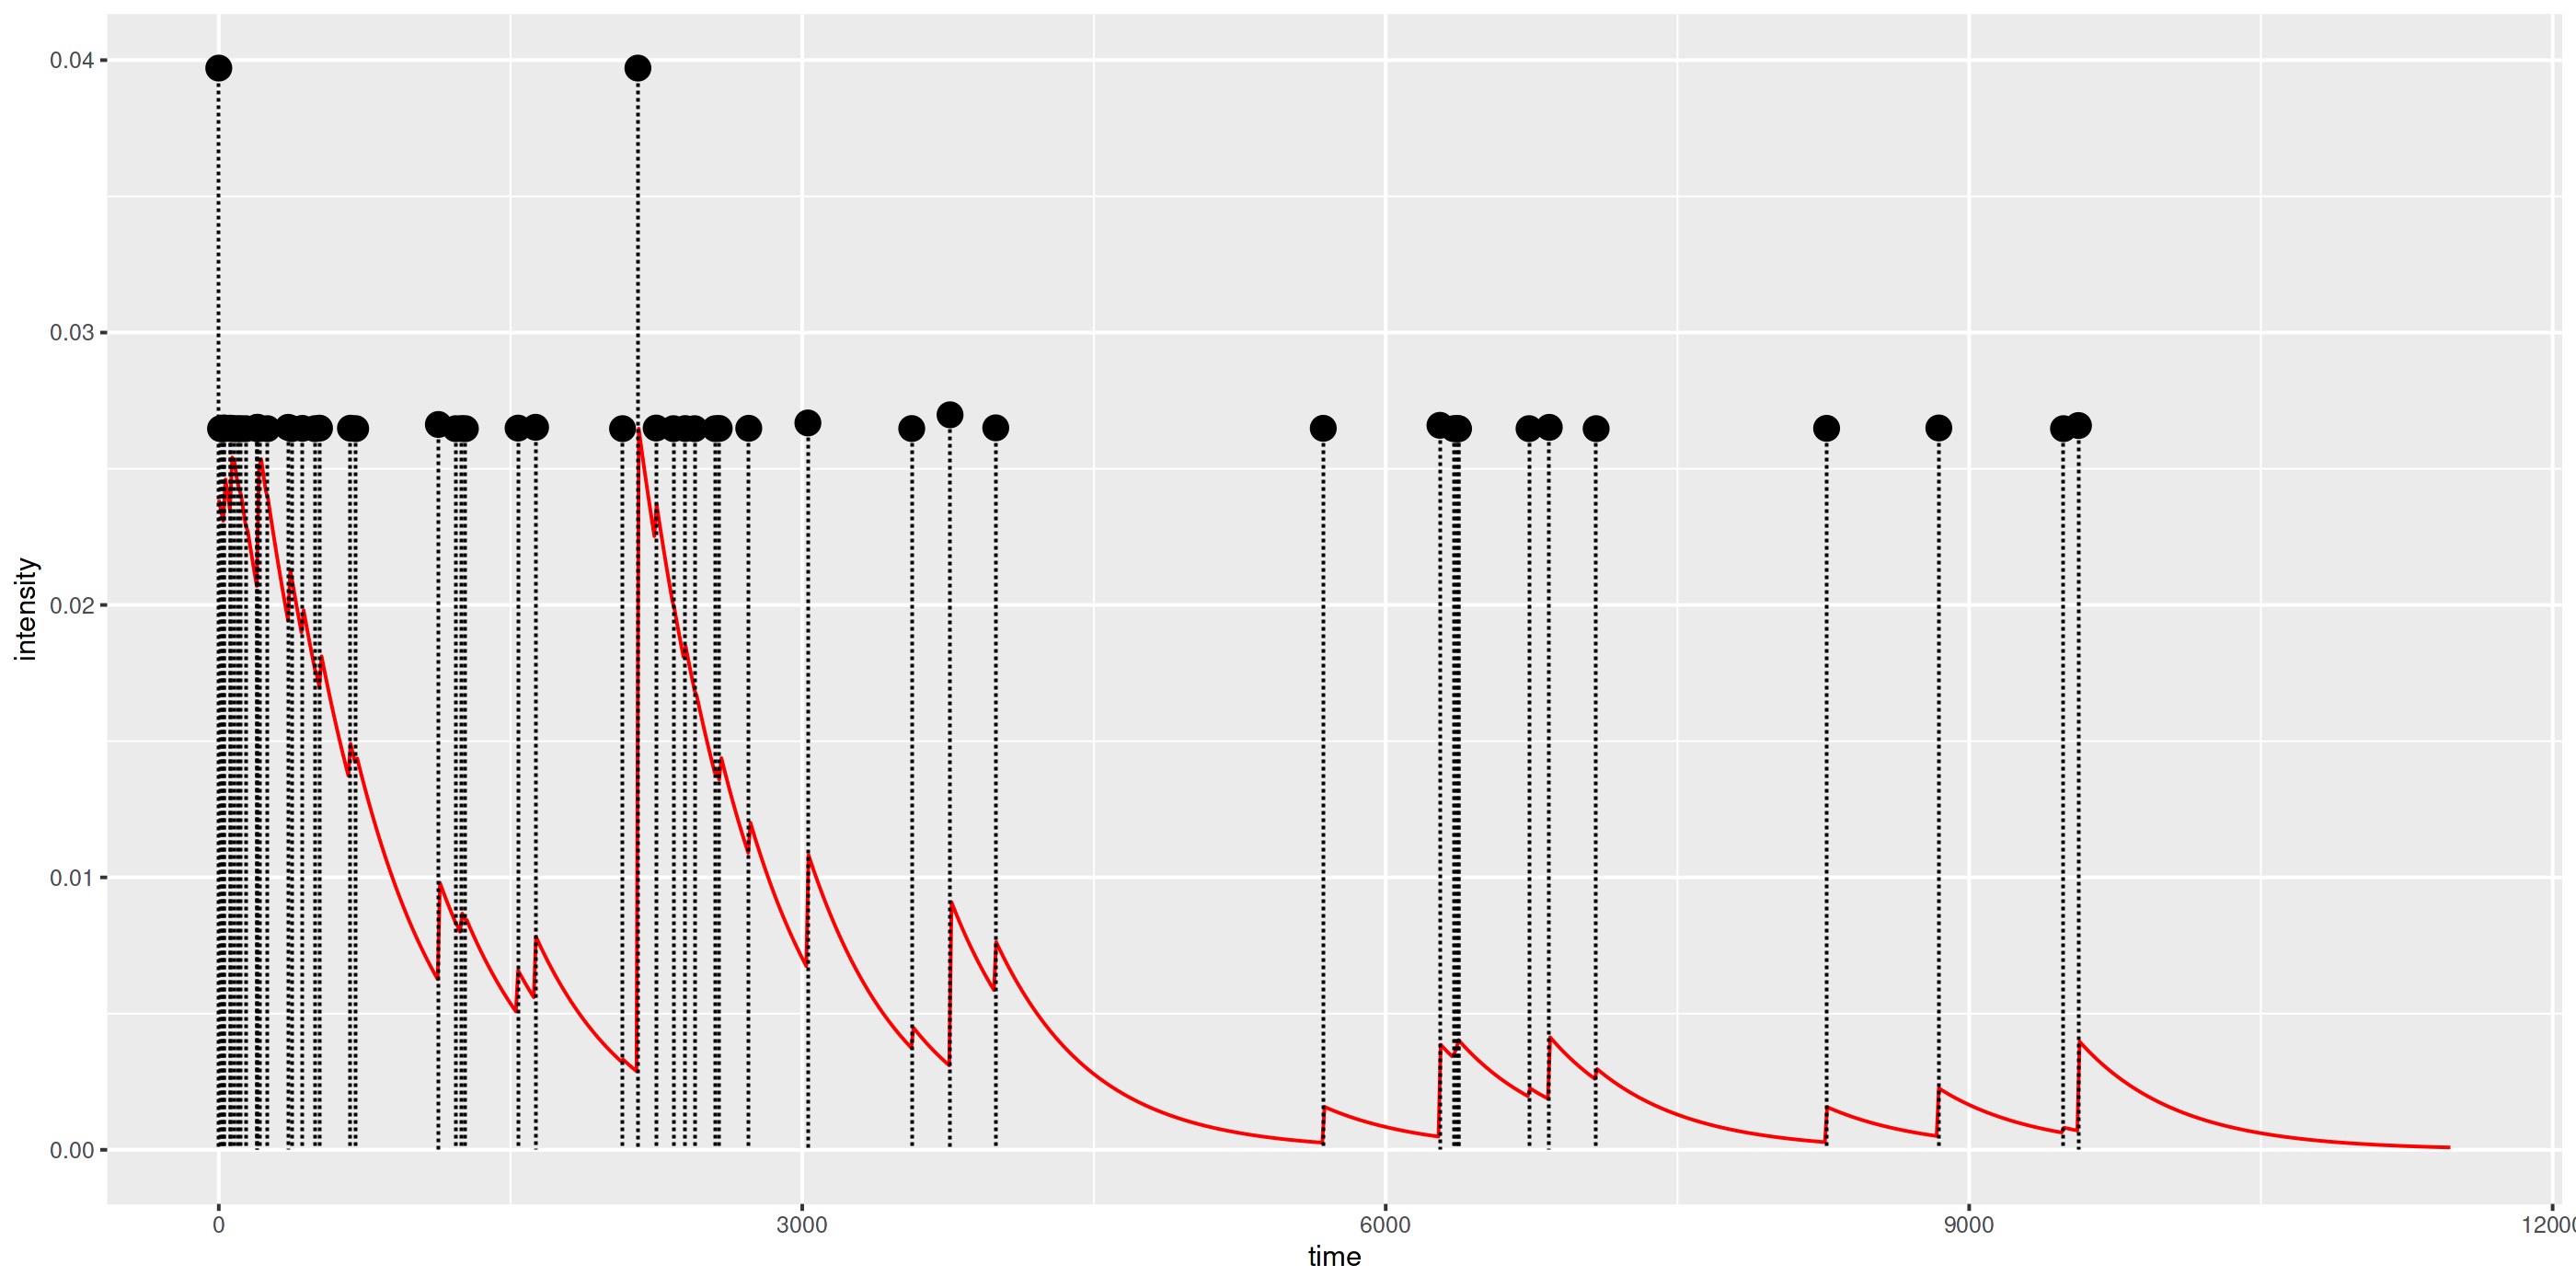

In [40]:
run_hawkes(elon, 10000, 'mEXP')

- Model: EXP 
- No. of cascades: 1 
- init_par:
  K 5.79e+00; theta 2.28e-01
- par:
  K 9.95e-01; theta 4.58e-04
- Neg Log Likelihood: 1406.71 
- lower_bound:
  K 1.00e-100; theta 1.00e-100
- upper_bound:
  K 1.00e+04; theta 3.00e+02
- Convergence: 0 
[1] "Original set size:"
[1] 203
[1] "Train set size:"
[1] 196
[1] "Branching factor:"
[1] 0.995125
[1] "Final tweets count prediction"
[1] 205.1904
[1] "Error rate"
[1] 1.079028


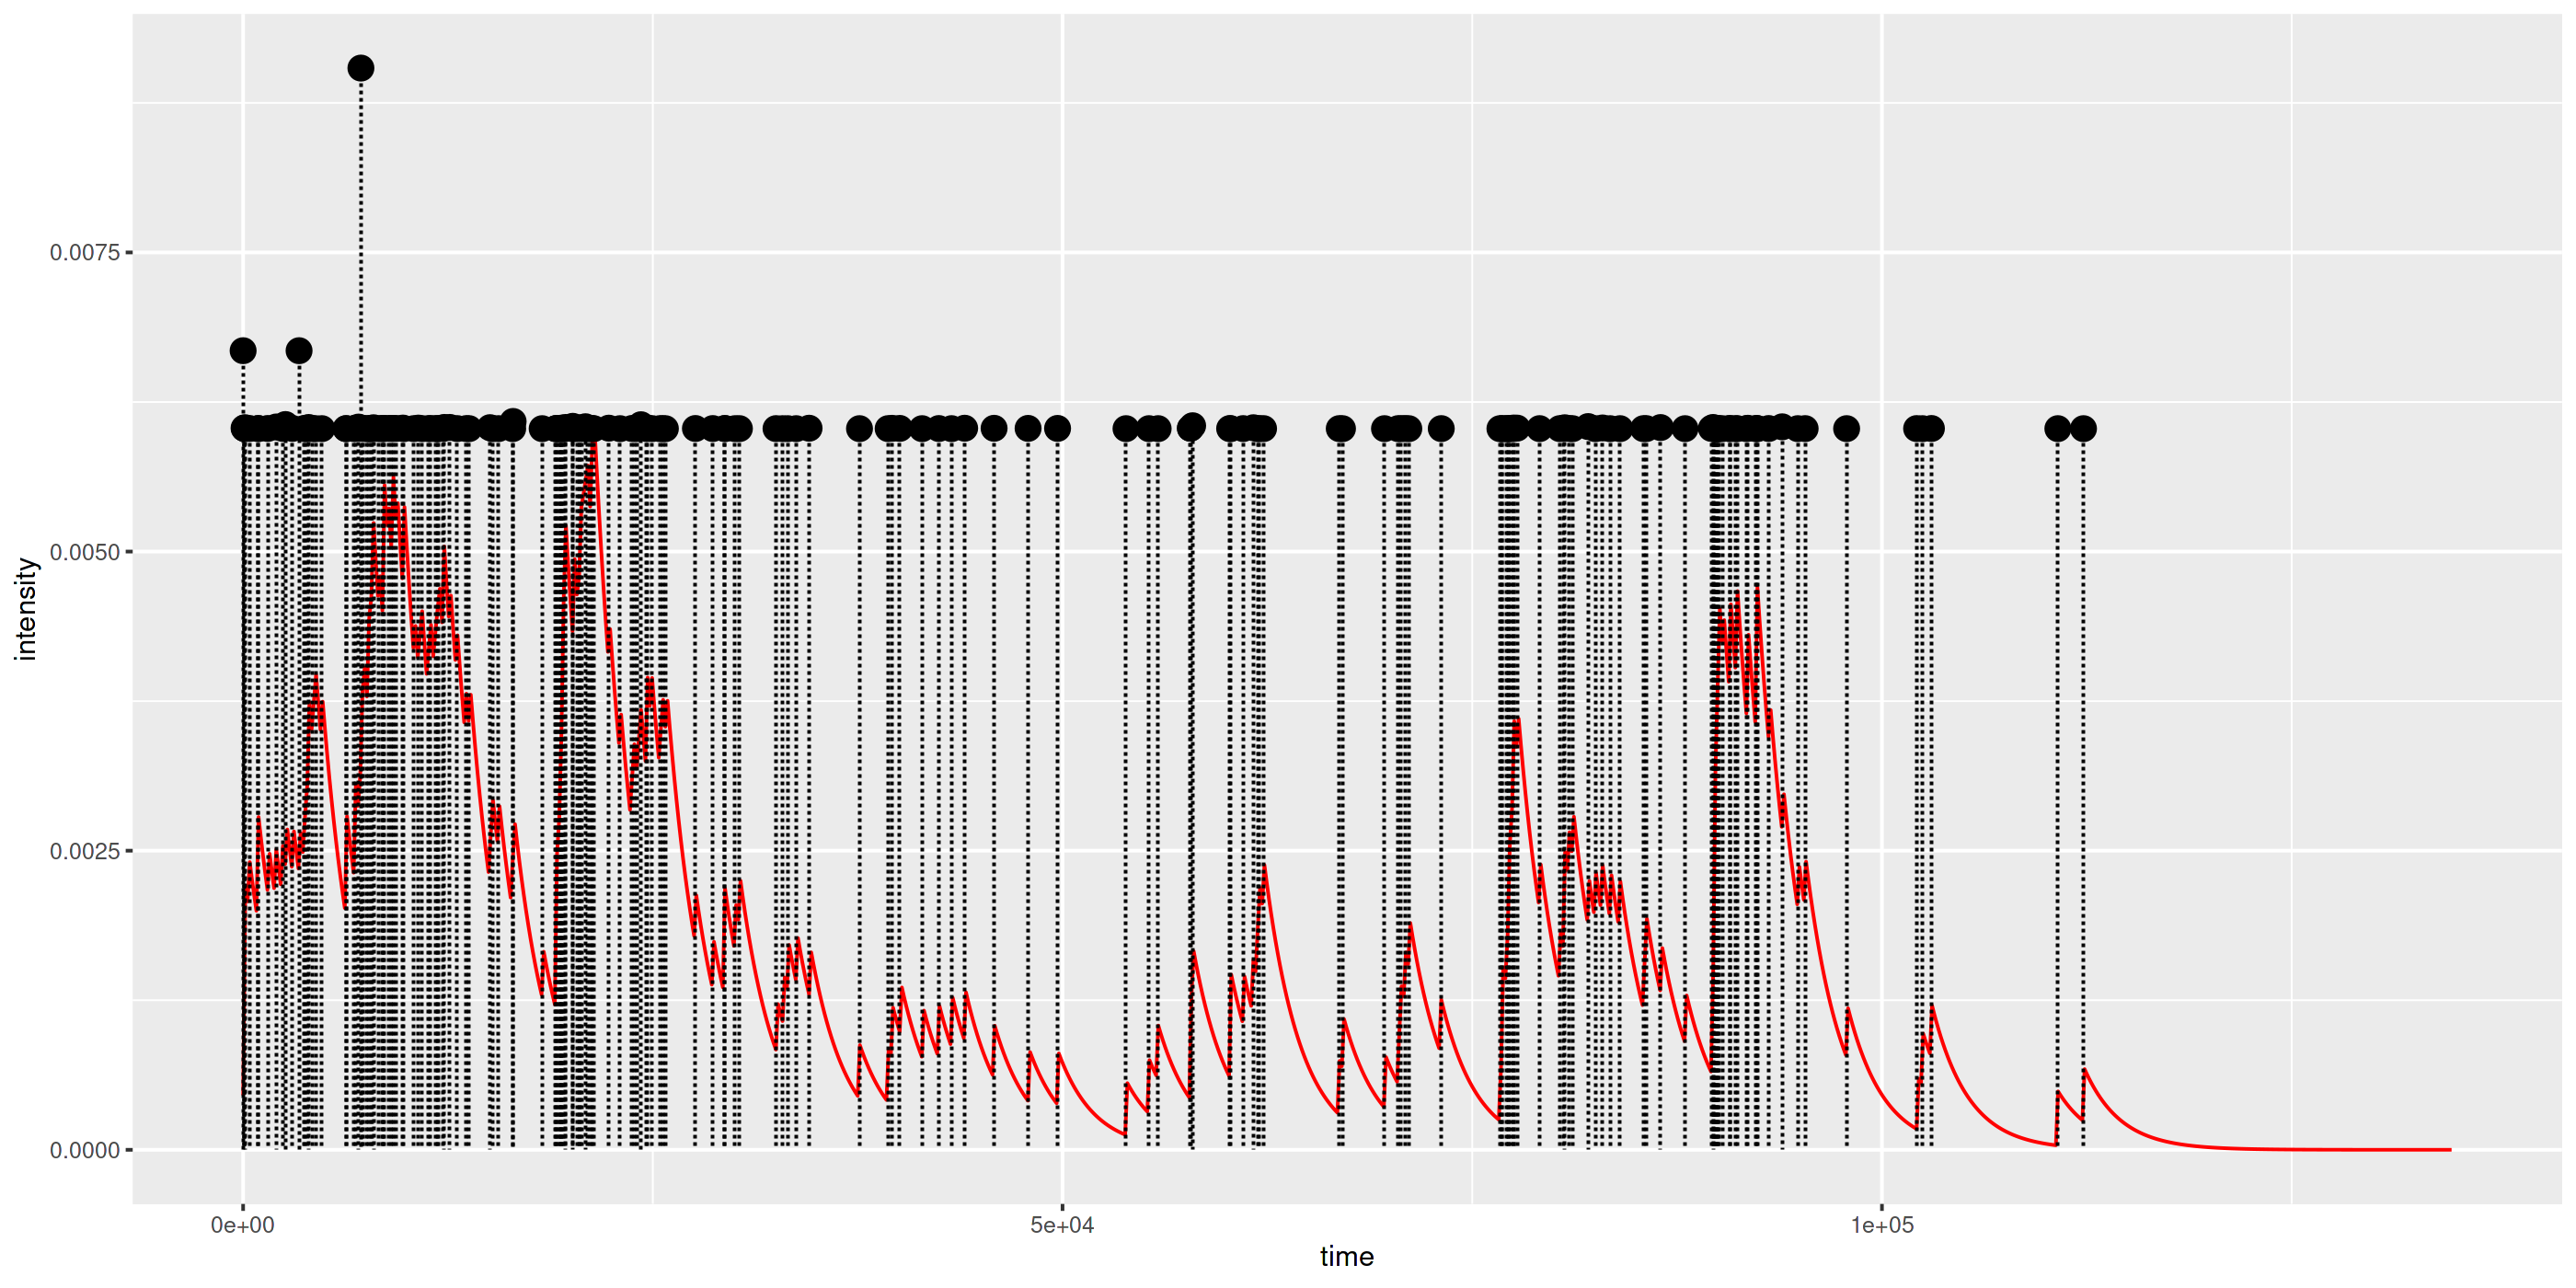

In [58]:
run_hawkes(lettuce, 120000, 'EXP')

- Model: mEXP 
- No. of cascades: 1 
- init_par:
  K 3.78e-01; beta 8.52e-01; theta 2.83e+00
- par:
  K 8.53e-01; beta 3.22e-02; theta 4.35e-04
- Neg Log Likelihood: 1080.04 
- lower_bound:
  K 1.00e-100; beta 1.00e-100; theta 1.00e-100
- upper_bound:
  K 1.00e+04; beta 1.02e+00; theta 3.00e+02
- Convergence: 0 
[1] "Original set size:"
[1] 203
[1] "Train set size:"
[1] 152
[1] "Branching factor:"
[1] 0.8807977
[1] "Final tweets count prediction"
[1] 183.5872
[1] "Error rate"
[1] 9.562936


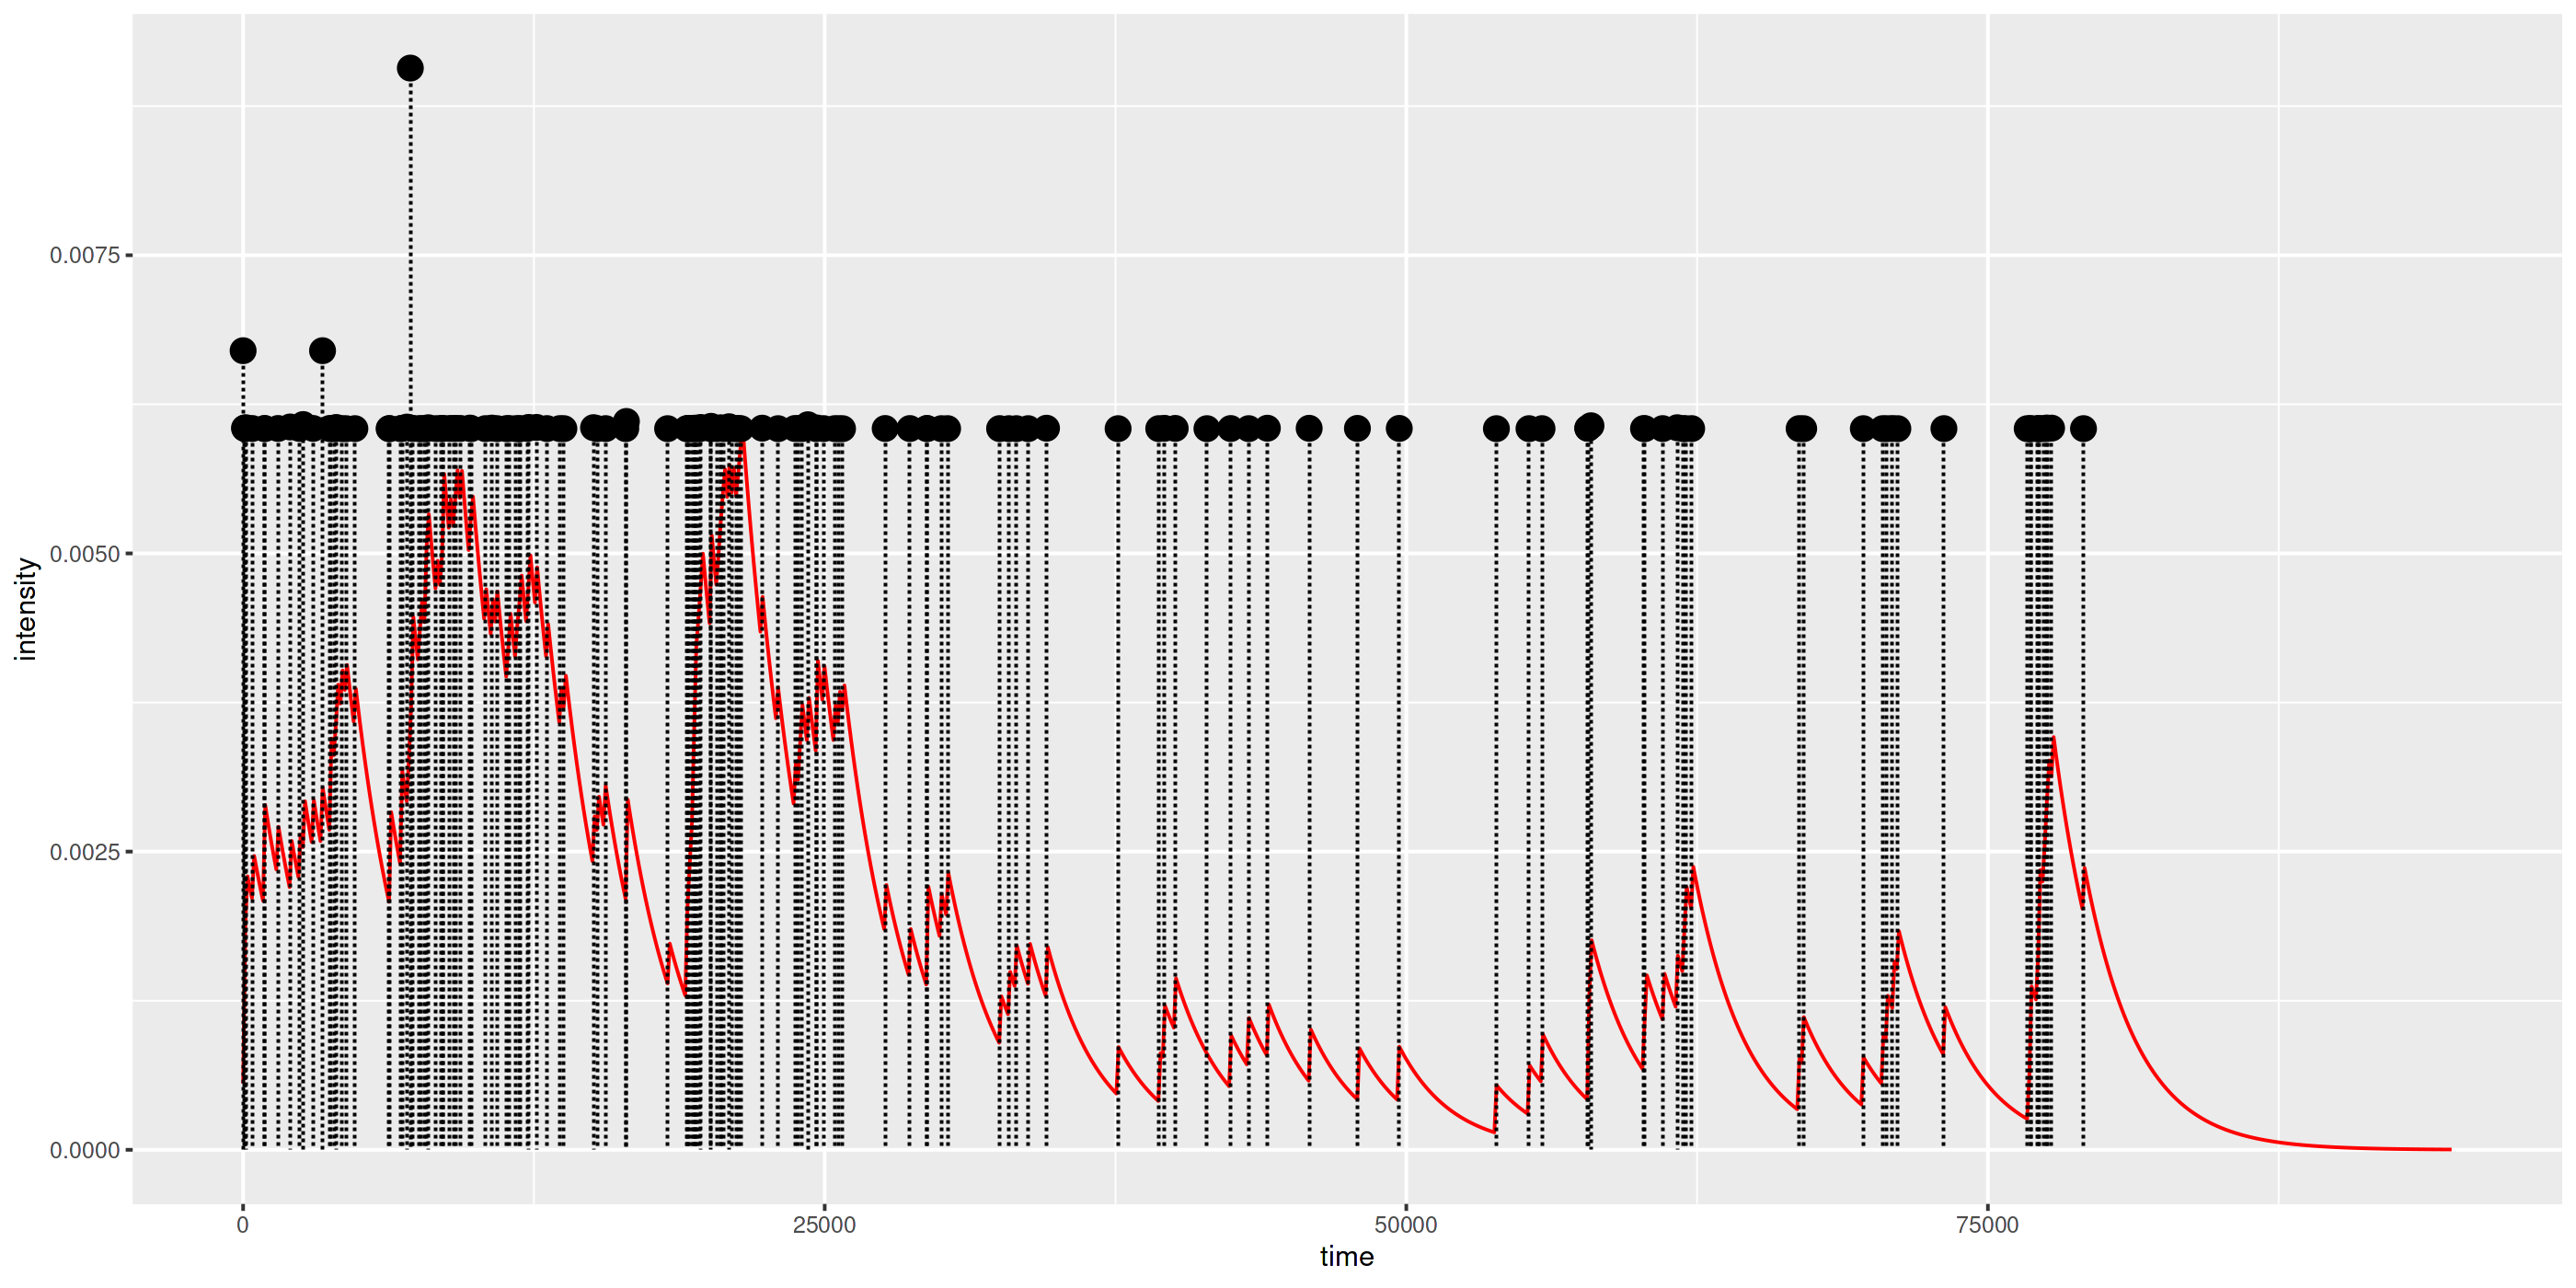

In [66]:
run_hawkes(lettuce, 80000, 'mEXP')